<a href="https://colab.research.google.com/github/igory1999/ProgrammingAssignment2/blob/master/data1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression example

## Data Generation for regression example

In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt

class data:
    def __init__(self, size=10, f=lambda x: x*x, left=0, right=1, amplitude=1.0):
        """
        Generate (x,y) where y=f(x) + f(x)*<random number between 0 and 1>*amplitude.
        The data points are randomly shuffled.
        """
        self.x = np.arange(left,right,(right-left)/float(size))
        self.y = f(self.x)*(1 + amplitude*np.random.random_sample(size))
        self.shuffle()
    def shuffle(self):
        """Randomly change the order of data points"""
        xy = np.stack((self.x, self.y), axis=-1)
        np.random.shuffle(xy)
        self.x = xy[:,0].reshape(self.x.shape[0],1)
        self.y = xy[:,1].reshape(self.y.shape[0],1)
    def plot(self):
        plt.plot(self.x, self.y, 'bo')
        plt.show()
    def compute_tvt(self, split=(0.98,0.01)):
        """
        Split the data into train, validation and test sets, by default: 98+1+1%.
        Return ((x_train,y_train),(x_validation,y_validation),(x_test,y_test)).
        """
        assert(sum(split) < 1)
        b1 = int(len(self.x)*split[0])
        b2 = b1 + int(len(self.x)*split[1])
        train = (self.x[0:b1,0], self.y[0:b1,0])
        validation = (self.x[b1:b2,0], self.y[b1:b2,0])
        test = (self.x[b2:,0], self.y[b2:,0])        
        return (train, validation, test)


## My metrics

In [0]:
import keras.backend as K

def my_me(y_true, y_pred):
            return K.std(y_true-y_pred)

Using TensorFlow backend.


## Using Sequential model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
import pickle

In [0]:
N = 10000
epochs = 10

In [0]:
d = data(size=N, f = lambda x: (x-1)**3, left=-2, right=2, amplitude=1.0)

In [0]:
((x_train,y_train),(x_validation,y_validation),(x_test,y_test)) = d.compute_tvt(split=(0.9, 0.05))

In [0]:
f=open("test.pickle","wb")
pickle.dump((x_test,y_test),f)
f.close()

In [0]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=1))
model.add(Dense(1))

model.compile(optimizer='sgd', loss='mse', metrics=[my_me])

Instructions for updating:
Colocations handled automatically by placer.


## Visualizing the model

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

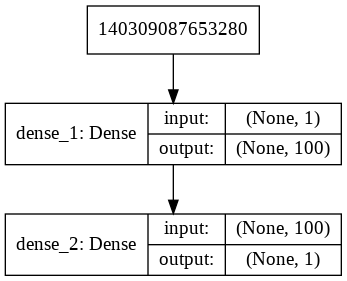

In [0]:
from IPython.display import Image
Image('model.png')

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 100, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "units": 1, "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer"

## Training the model

In [0]:
h  = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=epochs, batch_size=200,
               callbacks=[ModelCheckpoint('best_checkpoint.h5', monitor='val_loss', save_best_only=True, verbose=1)])


Instructions for updating:
Use tf.cast instead.
Train on 9000 samples, validate on 500 samples
Epoch 1/10
9000/9000 [==============================] - 1s 62us/step - loss: 39.9214 - my_me: 5.2609 - val_loss: 14.3303 - val_my_me: 3.7410

Epoch 00001: val_loss improved from inf to 14.33025, saving model to best_checkpoint.h5
Epoch 2/10
9000/9000 [==============================] - 0s 6us/step - loss: 10.7016 - my_me: 3.2342 - val_loss: 11.3174 - val_my_me: 3.3020

Epoch 00002: val_loss improved from 14.33025 to 11.31744, saving model to best_checkpoint.h5
Epoch 3/10
9000/9000 [==============================] - 0s 6us/step - loss: 9.2695 - my_me: 3.0117 - val_loss: 10.0262 - val_my_me: 3.1281

Epoch 00003: val_loss improved from 11.31744 to 10.02618, saving model to best_checkpoint.h5
Epoch 4/10
9000/9000 [==============================] - 0s 6us/step - loss: 8.7201 - my_me: 2.9322 - val_loss: 9.5461 - val_my_me: 3.0466

Epoch 00004: val_loss improved from 10.02618 to 9.54609, saving model

In [0]:
!ls

best_checkpoint.h5  model.png  sample_data  test.pickle


In [0]:
model.save("final.h5")

In [0]:
!ls

best_checkpoint.h5  final.h5  model.png  sample_data  test.pickle


In [0]:
f=open("history.pickle","wb")
pickle.dump((h.history,h.params), f)
f.close()

In [0]:
!ls

best_checkpoint.h5  history.pickle  sample_data
final.h5	    model.png	    test.pickle


## Loading the model

In [0]:
from keras.models import load_model

In [0]:
model = load_model("best_checkpoint.h5", custom_objects={"my_me":my_me})

In [0]:
x_test, y_test = pickle.load(open("test.pickle","rb"))
y_test_predict = model.predict(x_test)

## Comparing predictions with measurements

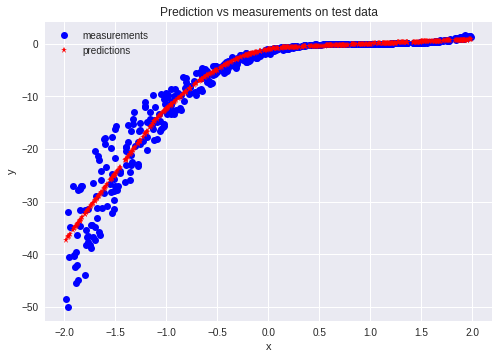

<Figure size 576x396 with 0 Axes>

In [0]:
plt.plot(x_test, y_test, 'bo', label = "measurements")
plt.plot(x_test, y_test_predict, 'r*', label = "predictions")
plt.title("Prediction vs measurements on test data")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()
plt.clf()

## History object

In [0]:
history, params  = h.history, h.params
print("history=",history)
print("="*50)
print("params=",params)
print("="*50)


history= {'val_loss': [14.33025484085083, 11.317443656921387, 10.026184368133546, 9.546090221405029, 9.062567710876465, 8.716184902191163, 8.411919784545898, 8.018847560882568, 7.818893384933472, 7.7405595779418945], 'val_my_me': [3.740951108932495, 3.301971912384033, 3.128059482574463, 3.0465558052062987, 2.9726733207702636, 2.911738967895508, 2.85943341255188, 2.8016704082489015, 2.7679532289505007, 2.7521208763122558], 'loss': [39.921443133884004, 10.701584815979004, 9.26946268081665, 8.720053047604031, 8.392983362409804, 8.04067652490404, 7.687637323803372, 7.40084867477417, 7.274180640114678, 7.22964071697659], 'my_me': [5.26089481777615, 3.234153816435072, 3.0117076132032605, 2.9321798854404024, 2.8700221220652264, 2.800372004508972, 2.7475546174579195, 2.6994450039333766, 2.666991196738349, 2.6500817669762506]}
params= {'batch_size': 200, 'epochs': 10, 'steps': None, 'samples': 9000, 'verbose': 1, 'do_validation': True, 'metrics': ['loss', 'my_me', 'val_loss', 'val_my_me']}


## Loss on training and validation datasets

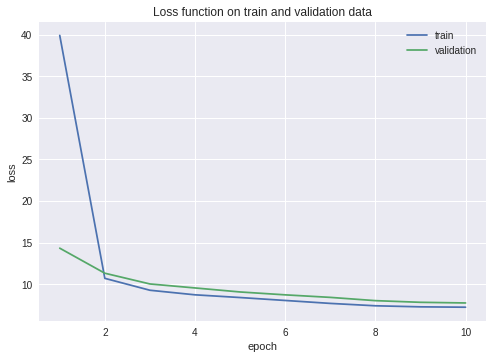

<Figure size 576x396 with 0 Axes>

In [0]:
plt.plot(range(1, params['epochs']+1), history['loss'], label="train")
plt.plot(range(1, params['epochs']+1), history['val_loss'], label="validation")
plt.legend()
plt.title("Loss function on train and validation data")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid(True)
plt.show()
plt.clf()

## Custom metrics on training and validation data sets

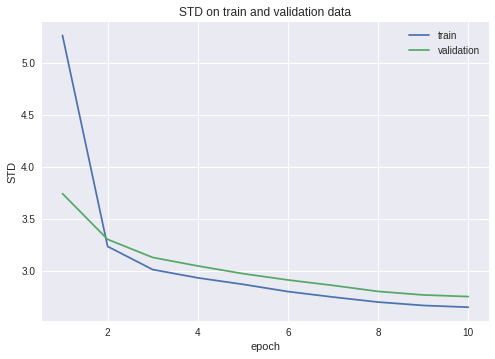

<Figure size 576x396 with 0 Axes>

In [0]:
plt.plot(range(1, params['epochs']+1), history['my_me'], label="train")
plt.plot(range(1, params['epochs']+1), history['val_my_me'], label="validation")
plt.legend()
plt.title("STD on train and validation data")
plt.xlabel("epoch")
plt.ylabel("STD")
plt.grid(True)
plt.show()
plt.clf()

Put your image in /usr/local/share/jupyter/nbextensions/google.colab/

Then display it from /nbextensions/google.colab/, e.g.

%%html
<img src='/nbextensions/google.colab/image.png' />




from IPython.display import Image
Image('bp.png')
You can set width and height as well

Image("bp.png", width=100, height=100)
To display more than 1 image, you need to call display. (it’s auto for just 1 image)

from IPython.display import Image, display
display(Image('1.png'))
display(Image('2.png'))

